Import Statement

In [2]:
pip install pandas numpy matplotlib seaborn

In [3]:
import pandas as pd
import math
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import statsmodels.api as sns
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Notebook Introduction
1. Data Source are from  https://data.boston.gov/dataset/approved-building-permits and https://data.boston.gov/dataset/live-street-address-management-sam-addresses
2. Finding insight and correlation between the two dataset.

Code Processing and data cleaning

In [4]:
drive.mount('/content/drive/')
df_permit = pd.read_csv('../data/building_permits.csv')
df_addy = pd.read_csv('../data/Live_Street_Address_Management_(SAM)_Addresses.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<ipython-input-4-f8d41df1be9f>:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_permit = pd.read_csv('/content/drive/My Drive/CS506 Proj/building_permits.csv')
<ipython-input-4-f8d41df1be9f>:3: DtypeWarning: Columns (8,9,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_addy = pd.read_csv('/content/drive/My Drive/CS506 Proj/Live_Street_Address_Management_(SAM)_Addresses.csv')


In [5]:
df_permit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617698 entries, 0 to 617697
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   permitnumber        617698 non-null  object 
 1   worktype            613157 non-null  object 
 2   permittypedescr     617698 non-null  object 
 3   description         613157 non-null  object 
 4   comments            617491 non-null  object 
 5   applicant           608874 non-null  object 
 6   declared_valuation  617698 non-null  object 
 7   total_fees          617698 non-null  object 
 8   issued_date         617698 non-null  object 
 9   expiration_date     592108 non-null  object 
 10  status              617698 non-null  object 
 11  owner               603105 non-null  object 
 12  occupancytype       615769 non-null  object 
 13  sq_feet             617698 non-null  float64
 14  address             610741 non-null  object 
 15  city                617513 non-nul

In [6]:
df_addy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399908 entries, 0 to 399907
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   X                     399908 non-null  float64
 1   Y                     399908 non-null  float64
 2   SAM_ADDRESS_ID        399908 non-null  int64  
 3   RELATIONSHIP_TYPE     399908 non-null  int64  
 4   BUILDING_ID           399908 non-null  int64  
 5   FULL_ADDRESS          399908 non-null  object 
 6   STREET_NUMBER         399908 non-null  object 
 7   IS_RANGE              399908 non-null  int64  
 8   RANGE_FROM            26158 non-null   object 
 9   RANGE_TO              26158 non-null   object 
 10  UNIT                  268726 non-null  object 
 11  FULL_STREET_NAME      399908 non-null  object 
 12  STREET_ID             399908 non-null  int64  
 13  STREET_PREFIX         399908 non-null  object 
 14  STREET_BODY           399908 non-null  object 
 15  

In [7]:
# Check for a common column name
common_column = set(df_permit.columns).intersection(df_addy.columns)

# If there is a common column, use it to merge the dataframes
if common_column:
    merged_df = pd.merge(df_permit, df_addy, on=common_column)
else:
    print("No common column found to merge the dataframes.")


No common column found to merge the dataframes.


#Spatial Analysis and Geographic Information Systems (GIS) Projects

In [8]:
pip install pandas geopandas matplotlib plotly

In [9]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
# Load your data
permits_df= pd.read_csv('../data/building_permits.csv')
buildings_df = pd.read_csv('../data/Live_Street_Address_Management_(SAM)_Addresses.csv')

# Assuming 'X' and 'Y' columns ar longitude and latitude, respectively, for the buildings dataset
# and 'gpsx' and 'gpsy' for the permits dataset. Adjust column names as necessary.
buildings_gdf = gpd.GeoDataFrame(buildings_df, geometry=gpd.points_from_xy(buildings_df.X_COORD, buildings_df.Y_COORD))
permits_gdf = gpd.GeoDataFrame(permits_df, geometry=gpd.points_from_xy(permits_df.gpsx, permits_df.gpsy))

<ipython-input-10-fb889c384898>:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  permits_df= pd.read_csv('/content/drive/My Drive/CS506 Proj/building_permits.csv')
<ipython-input-10-fb889c384898>:3: DtypeWarning: Columns (8,9,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  buildings_df = pd.read_csv('/content/drive/My Drive/CS506 Proj/Live_Street_Address_Management_(SAM)_Addresses.csv')


In [12]:
# Ensure the latitude and longitude columns are numeric and not empty
buildings_df['Lat'] = pd.to_numeric(buildings_df['Y_COORD'], errors='coerce')
buildings_df['Lon'] = pd.to_numeric(buildings_df['X_COORD'], errors='coerce')
permits_df['Lat'] = pd.to_numeric(permits_df['gpsy'], errors='coerce')
permits_df['Lon'] = pd.to_numeric(permits_df['gpsx'], errors='coerce')

# Drop rows with NaN values in Lat or Lon columns to avoid plotting issues
# buildings_df.dropna(subset=['Lat', 'Lon'], inplace=True)
# permits_df.dropna(subset=['Lat', 'Lon'], inplace=True)

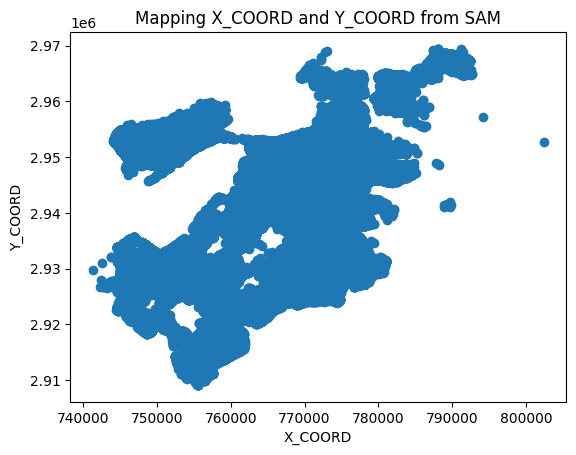

In [48]:
plt.scatter(x=buildings_df['Lon'], y=buildings_df['Lat'])
plt.title('Mapping X_COORD and Y_COORD from SAM')
plt.xlabel('X_COORD')
plt.ylabel('Y_COORD')
plt.show()

In [ ]:
# fig = px.scatter_mapbox(buildings_df,
#                         lat="Lat",
#                         lon="Lon",
#                         hover_name="FULL_ADDRESS",
#                         zoom=8,
#                         height=800,
#                         width=800)

# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [ ]:
# from pyproj import Proj, transform

# # Define the projection transformation.
# # This needs to be adjusted to match the projection of your data.
# # For example, if your data is in UTM zone 17N, the EPSG code is 32617.
# # Replace 'EPSG:32617' with the correct EPSG code for your data's projection.
# input_proj = Proj('EPSG:32619')   # Example: UTM zone 17N
# output_proj = Proj('EPSG:4326')  # WGS84

# def convert_coords(row):
#     lon, lat = transform(input_proj, output_proj, row['gpsx'], row['gpsy'])
#     return pd.Series({'Latitude': lat, 'Longitude': lon})

# # Apply the conversion
# permits_df[['gpsy', 'gpsx']] = permits_df.apply(convert_coords, axis=1)
# print(permits_df[['gpsy', 'gpsx']])

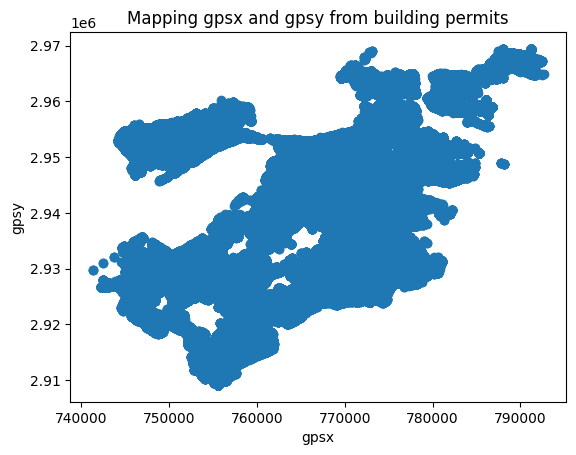

In [47]:
permits_df['gpsy'] = permits_df['gpsy'].abs()
plt.scatter(x=permits_df['gpsx'], y=permits_df['gpsy'].abs())
plt.title('Mapping gpsx and gpsy from building permits')
plt.xlabel('gpsx')
plt.ylabel('gpsy')
plt.show()

In [15]:
print(permits_df[['gpsx', 'gpsy']].head(10))

            gpsx          gpsy
0  777000.467775  2.956235e+06
1  751016.119559  2.920239e+06
2  775710.380542  2.962078e+06
3  769648.312793  2.949423e+06
4  749690.298790  2.950791e+06
5  755678.944235  2.953789e+06
6  757700.459597  2.956331e+06
7  774628.606784  2.958575e+06
8  767043.110454  2.944477e+06
9  761428.836529  2.939471e+06


In [16]:
# Save the updated DataFrame to a new CSV file in your Google Drive
new_csv_path = '../data/permits_with_lat_lon.csv'
permits_df.to_csv(new_csv_path, index=False)

# Print the path to the newly created CSV file
print('New CSV file saved to:', new_csv_path)


New CSV file saved to: /content/drive/My Drive/CS506 Proj/permits_with_lat_lon.csv


In [ ]:
# fig = px.scatter_mapbox(permits_df,
#                         lat="gpsx",
#                         lon="gpsy",
#                         hover_name="address",
#                         zoom=8,
#                         height=1000,
#                         width=1000)

# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

Data cleaning

1. Removed dollar sign and commas and convert to float
2. Changed the date to be able preprocessed data
3. Changed ZIP code to a numerical format
4. Merge the address and zipcode
5. Combined data of address between two database

In [23]:
# prompt: Combine the dataset of df_permit and df_addy

import pandas as pd
merged_df_addy_permit = pd.merge(df_permit, df_addy)


#Combined data

In [17]:
# Remove dollar signs and commas, then convert 'declared_valuation' to float
df_permit['declared_valuation'] = df_permit['declared_valuation'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_permit.fillna({'applicant': 'Unknown', 'declared_valuation': df_permit['declared_valuation'].median()}, inplace=True)
df_permit['issued_date'] = pd.to_datetime(df_permit['issued_date'])
df_permit['expiration_date'] = pd.to_datetime(df_permit['expiration_date'])
# df_permit['zip'] = df_permit['zip'].astype(str)

unique_zip_codes = df_permit['zip'].unique()
zip_total = df_permit.groupby('zip').size().sort_values(ascending=False)
zip_total_max = df_permit.groupby('zip').size().max()
print(zip_total)


# Convert ZIP_CODE to numeric for feature engineering (if not already numeric)
df_addy['ZIP_CODE'] = pd.to_numeric(df_addy['ZIP_CODE'], errors='coerce')
# print(df_addy['ZIP_CODE'])
# Ensure the merge key transformation steps are retained from the previous step
df_permit['merge_key'] = df_permit['address'].str.lower() + ' ' + df_permit['zip'].astype(str)
df_addy['merge_key'] = df_addy['FULL_ADDRESS'].str.lower() + ' ' + df_addy['ZIP_CODE'].astype(str)

# Merge the DataFrames on the new merge_key
merged_df = pd.merge(df_permit, df_addy, on='merge_key', how='inner')

# Assuming 'declared_valuation' and 'ZIP_CODE' are the features you want to use for engineering a new feature
# Ensure these columns exist in merged_df
if 'declared_valuation' in merged_df.columns and 'ZIP_CODE' in merged_df.columns:
    merged_df['new_feature'] = merged_df['declared_valuation'] / merged_df['ZIP_CODE']
else:
    print("One or both of the columns 'declared_valuation' or 'ZIP_CODE' do not exist in merged_df.")

scaler = StandardScaler()
numeric_features = merged_df.select_dtypes(include=['int64', 'float64']).columns
merged_df[numeric_features] = scaler.fit_transform(merged_df[numeric_features])


zip
2116.0    39894
2130.0    30649
2124.0    29154
2127.0    28054
2131.0    25249
          ...  
01803         1
02103         1
02468         1
08091         1
8             1
Length: 85, dtype: int64


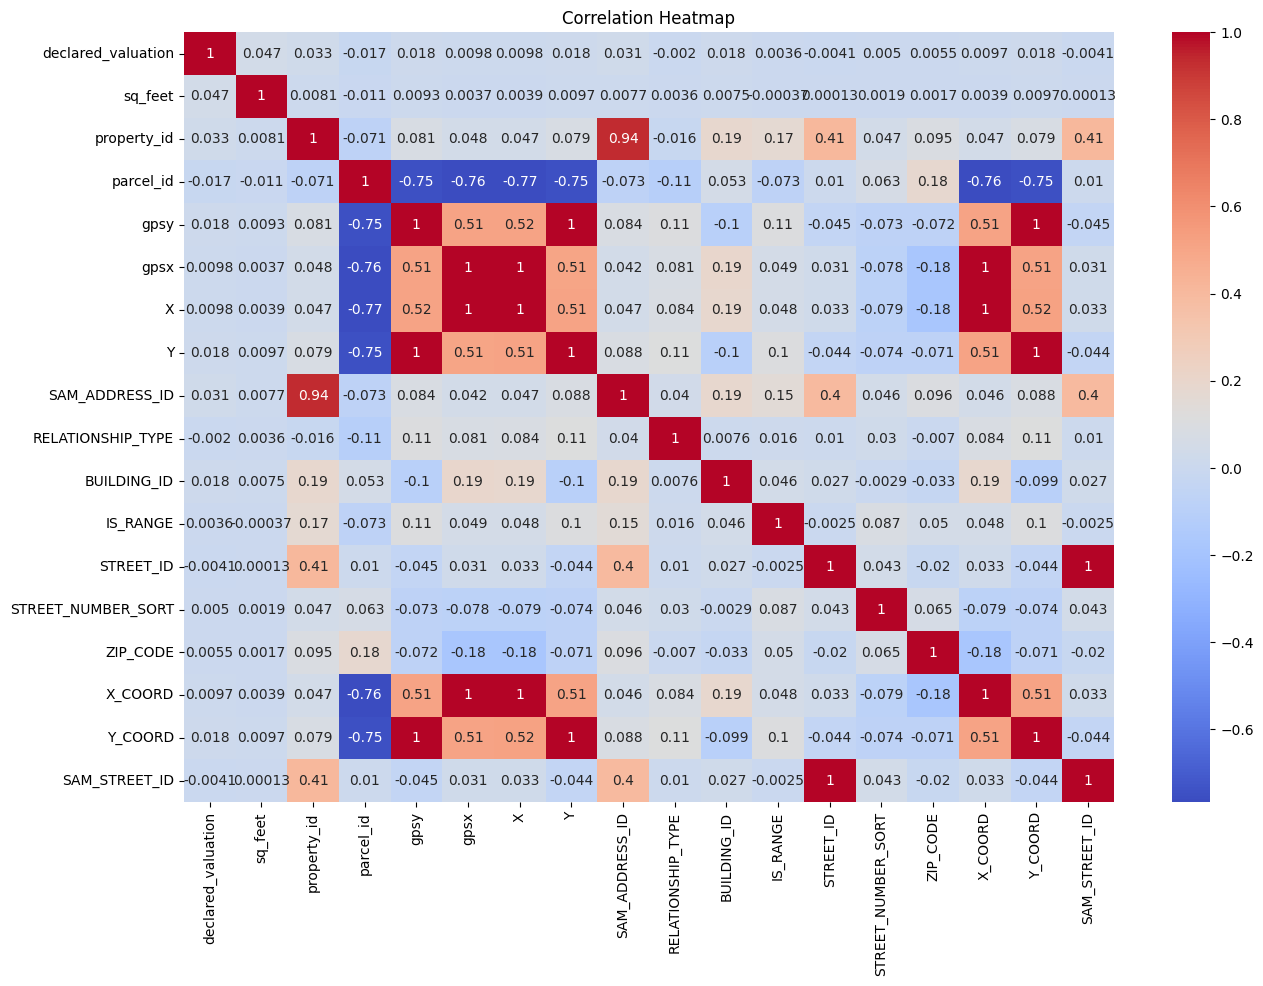

In [24]:
import matplotlib.pyplot as plt
# Select only numeric columns for the correlation matrix
numeric_cols = merged_df_addy_permit.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns
corr_matrix = numeric_cols.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



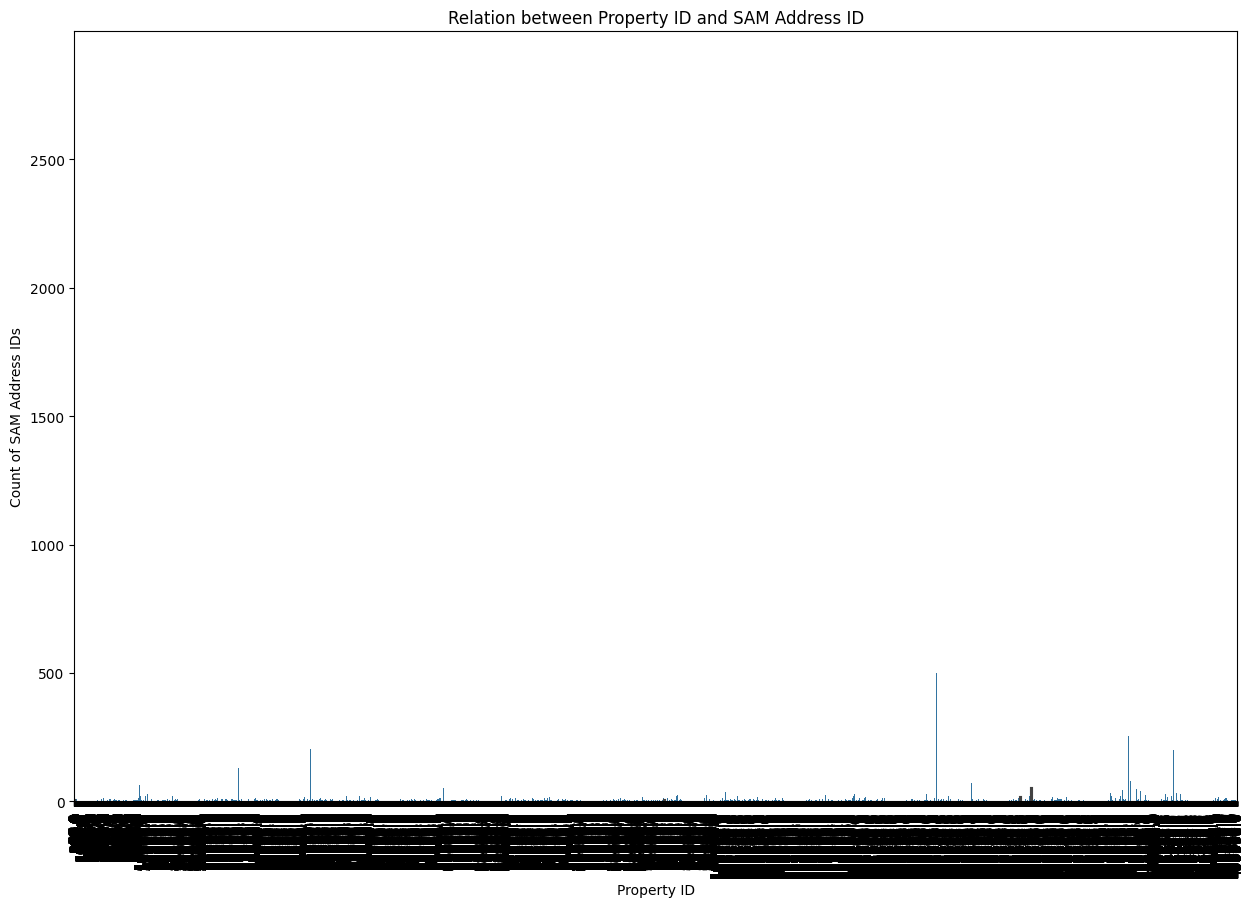

In [28]:
# prompt: find relation between property_id and SAM_ADDRESS_ID AND GRAPH IT

import matplotlib.pyplot as plt
# Extract relevant columns for analysis
df_plot = merged_df_addy_permit[['property_id', 'SAM_ADDRESS_ID']]

# Group the data by 'property_id' and count the occurrences of each 'SAM_ADDRESS_ID'
df_plot = df_plot.groupby('property_id')['SAM_ADDRESS_ID'].value_counts().reset_index(name='count')

# Sort the data in descending order of count
df_plot = df_plot.sort_values('count', ascending=False)

# Create a bar plot
plt.figure(figsize=(15, 10))
sns.barplot(data=df_plot, x='property_id', y='count')
plt.xticks(rotation=90)
plt.title('Relation between Property ID and SAM Address ID')
plt.xlabel('Property ID')
plt.ylabel('Count of SAM Address IDs')
plt.show()


In [29]:
print(merged_df["MAILING_NEIGHBORHOOD"].unique())

['Boston' 'West Roxbury' 'Charlestown' 'Roxbury' 'Brighton' 'Allston'
 'Jamaica Plain' 'East Boston' 'Dorchester' 'Hyde Park' 'South Boston'
 'Mission Hill' 'Mattapan' 'Roslindale' nan 'Chestnut Hill']


In [30]:
# Filter data for new housing units. This step assumes 'description' contains relevant keywords for new housing units.
housing_related_keywords = ['housing', 'residential', 'apartment', 'condo']
df_housing = merged_df[merged_df['description'].str.contains('|'.join(housing_related_keywords), case=False, na=False)]

# Step 2: Aggregation
# Aggregating by 'city' and counting permits. Adjust this if you'd rather aggregate by 'zip'
permits_by_city = df_housing.groupby('city').size().reset_index(name='permits_count')

# Sorting the data to find top communities with the highest number of permits
permits_by_city_sorted = permits_by_city.sort_values(by='permits_count', ascending=False)

# Step 3: Analysis
# Display the top 10 cities with the highest number of housing permits
print(permits_by_city_sorted.head(10))



             city  permits_count
4      Dorchester            126
13   South Boston             88
7   Jamaica Plain             30
14   West Roxbury             30
12        Roxbury             24
5     East Boston             22
11     Roslindale             22
2        Brighton             16
8        Mattapan             15
3     Charlestown             14


             city  average_valuation
7   Jamaica Plain          -0.023067
6       Hyde Park          -0.023957
3     Charlestown          -0.027034
12        Roxbury          -0.027271
5     East Boston          -0.027375
14   West Roxbury          -0.029323
0         Allston          -0.030362
2        Brighton          -0.030982
1          Boston          -0.030986
13   South Boston          -0.031728


<ipython-input-31-38764210e0a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='permits_count', y='city', data=permits_by_city_sorted.head(10), palette='viridis')


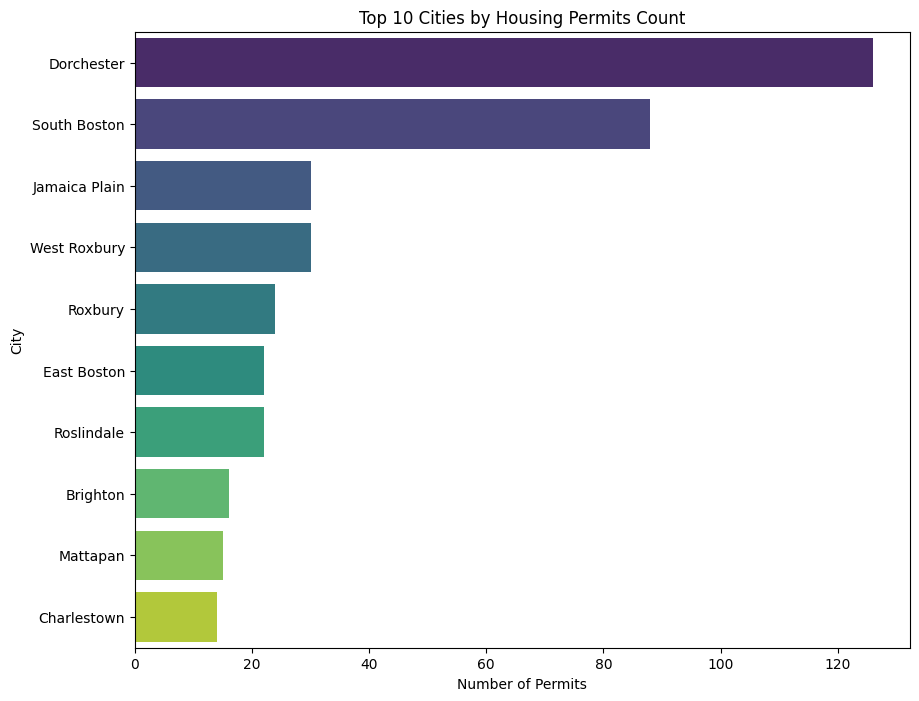

In [31]:
# Assuming 'declared_valuation' represents the valuation of the project, you can analyze average valuation by city
average_valuation_by_city = df_housing.groupby('city')['declared_valuation'].mean().reset_index(name='average_valuation')
average_valuation_by_city_sorted = average_valuation_by_city.sort_values(by='average_valuation', ascending=False)
print(average_valuation_by_city_sorted.head(10))

# Visualization - Bar plot of the top 10 cities by permit count
plt.figure(figsize=(10, 8))
sns.barplot(x='permits_count', y='city', data=permits_by_city_sorted.head(10), palette='viridis')
plt.title('Top 10 Cities by Housing Permits Count')
plt.xlabel('Number of Permits')
plt.ylabel('City')
plt.show()

In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# ... Your permit analysis code here ...

# Step 4: Merge the permit data with geographic boundaries
# Make sure that 'neighborhood_boundaries' is a GeoDataFrame with a 'name' column that matches 'city' in your permit data.
# Also, ensure that 'permits_by_city_sorted' is in the scope or recalculate it.

# For the purposes of this example, we'll just merge with the top 10
top_permits_by_city = average_valuation_by_city_sorted.head(10)
neighborhood_boundaries = permits_by_city_sorted.merge(top_permits_by_city, left_on='name', right_on='city')

# Map the permit counts to a color range
color_scale = plt.cm.get_cmap('Blues')
max_count = top_permits_by_city['permits_count'].max()
neighborhood_boundaries['color'] = neighborhood_boundaries['permits_count'].apply(lambda x: color_scale(x/max_count))

# Plotting the map with permit counts
fig, ax = plt.subplots(1, figsize=(30, 30))

# Plot using custom colors for permit counts
neighborhood_boundaries.plot(ax=ax, color=neighborhood_boundaries['color'], edgecolor='black', linewidth=0.5)

# Create a color bar legend for permit counts
sm = plt.cm.ScalarMappable(cmap=color_scale, norm=plt.Normalize(vmin=0, vmax=max_count))
sm._A = []  # Necessary line for ScalarMappable
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Permit Count')

# Annotations for permit count and city name
for idx, row in neighborhood_boundaries.iterrows():
    ax.annotate(f"{row['permits_count']}\n{row['city']}",
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                horizontalalignment='center', verticalalignment='center',
                fontsize=14, color='black')

plt.title('Top Cities by Housing Permits Count on Map')
plt.show()


KeyError: 'name'

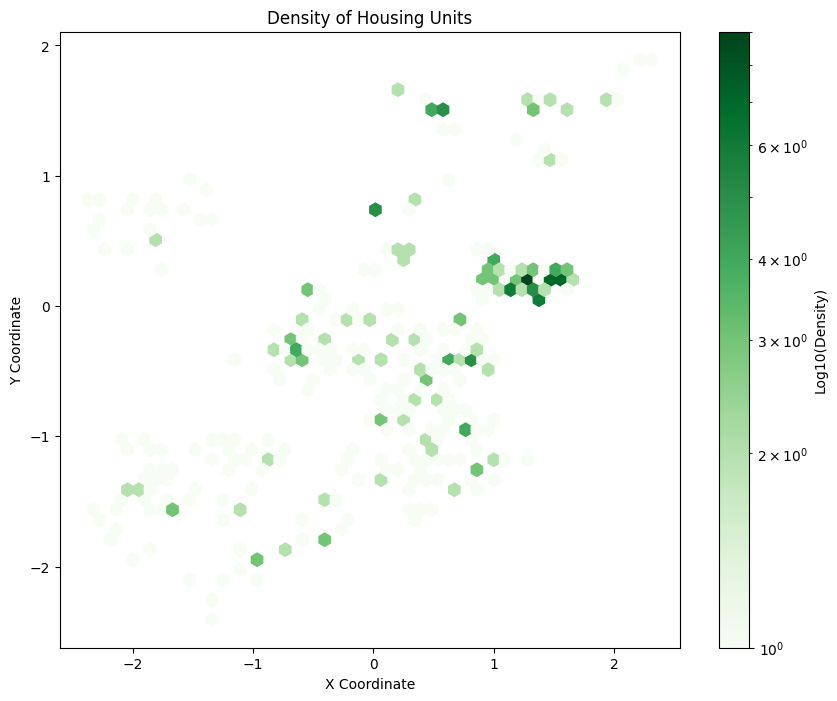

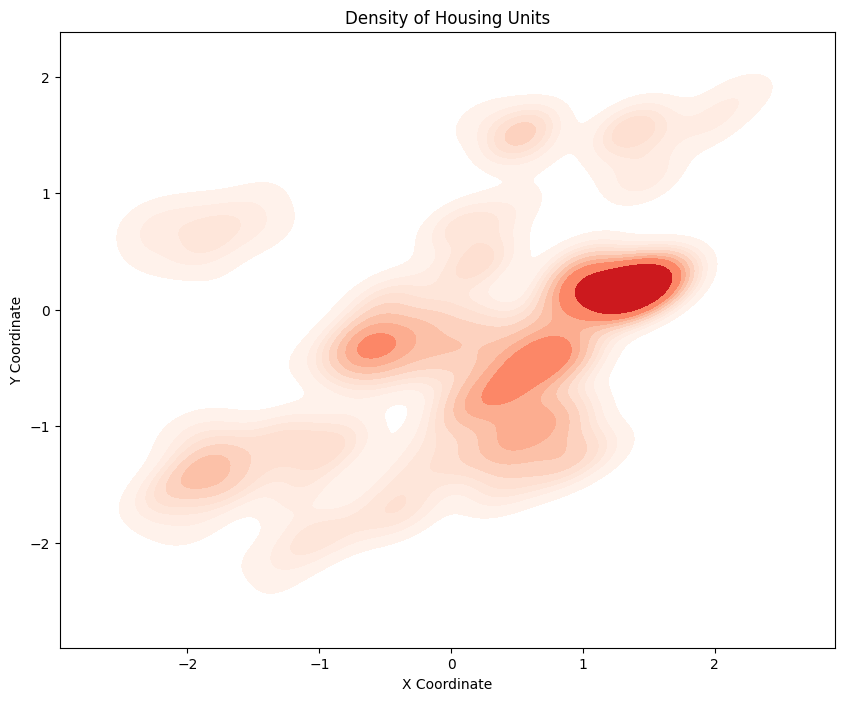

In [34]:
# Plotting
plt.figure(figsize=(10, 8))
# Using a hexbin plot for density
plt.hexbin(df_housing['X'], df_housing['Y'], gridsize=50, cmap='Greens', bins='log')
plt.colorbar(label='Log10(Density)')
plt.title('Density of Housing Units')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Alternatively, using seaborn's kdeplot for a smooth density estimate
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df_housing['X'], y=df_housing['Y'], cmap="Reds", fill=True, bw_adjust=.5)
plt.title('Density of Housing Units')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.show()

In [35]:
pip install geopandas matplotlib

In [36]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from shapely.geometry import Point

# Assuming df_permit is already loaded in your environment
# If not, load it here from its source

# Drop rows with missing GPS data to avoid errors
df_add_lat_lon = pd.read_csv('../data/permits_with_lat_lon.csv', low_memory=False)

df_add_lat_lon['gpsx'] = pd.to_numeric(df_add_lat_lon['gpsx'], errors='coerce')
df_add_lat_lon['gpsy'] = pd.to_numeric(df_add_lat_lon['gpsy'], errors='coerce')
# df_add_lat_lon['gpsy'] = pd.to_numeric(df_add_lat_lon['gpsy'], errors='coerce').abs()


# Drop rows with NaN or infinite values in 'gpsx' or 'gpsy'
df_add_lat_lon = df_add_lat_lon.dropna(subset=['gpsx', 'gpsy'])
df_add_lat_lon = df_add_lat_lon[np.isfinite(df_add_lat_lon['gpsx']) & np.isfinite(df_add_lat_lon['gpsy'])]

In [37]:
# Create a GeoDataFrame
gdf_permit = gpd.GeoDataFrame(
    df_add_lat_lon,
    geometry=gpd.points_from_xy(df_add_lat_lon.gpsx, df_add_lat_lon.gpsy),
    crs="EPSG:32619"
)

# crs="EPSG:4326"
# crs="EPSG:32619"
# Project to a UTM coordinate system that uses meters as distance units (e.g., for Boston area)
gdf_projected = gdf_permit.to_crs(epsg=32619)

# Extract the x and y coordinates
x = gdf_projected.geometry.x
y = gdf_projected.geometry.y


In [38]:
gdf_projected.geometry.x
# print(x, y)

0         777000.467775
1         751016.119559
2         775710.380542
3         769648.312793
4         749690.298790
              ...      
617693    774864.862213
617694    756414.438107
617695    759722.466351
617696    771088.017082
617697    773050.220380
Length: 603235, dtype: float64

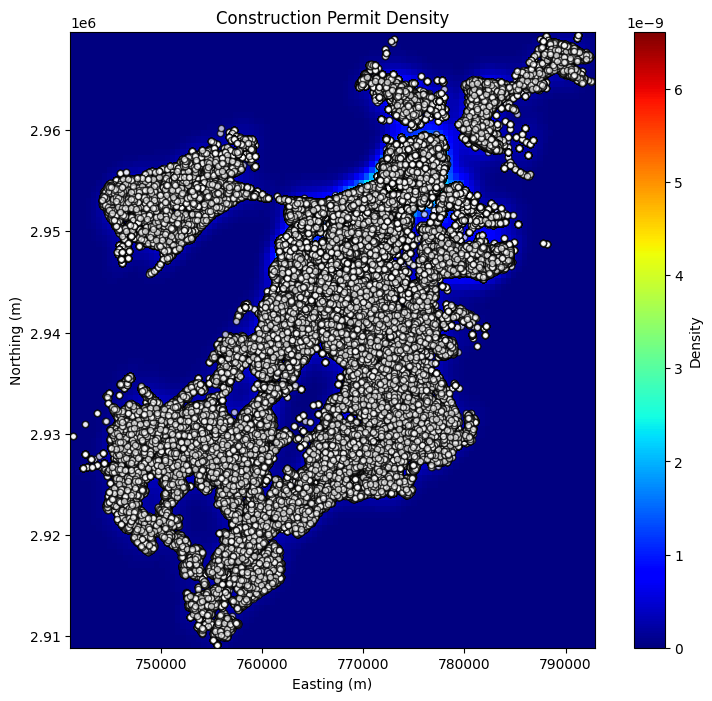

In [39]:
# Perform KDE, ensuring no NaN or inf values are passed
kde = gaussian_kde([x, y])

# Create grid to evaluate KDE
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Evaluate KDE on grid
zz = np.reshape(kde(np.vstack([xx.ravel(), yy.ravel()])), xx.shape)

# Plot heatmap
# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8))
# Define the color map and the normalization
cmap = plt.cm.jet  # A color map that's clear with high contrast
norm = plt.Normalize(vmin=zz.min(), vmax=zz.max())  # Normalize the color scale based on KDE values

# Create the heatmap
heatmap = ax.pcolormesh(xx, yy, zz, shading='auto', cmap=cmap, norm=norm)

# Plot the projected data points on top
projected_points = gdf_projected.plot(ax=ax, color='white', markersize=20, alpha=0.7, edgecolor='black', marker='o')

# Add a color bar for reference
colorbar = fig.colorbar(heatmap, ax=ax)
colorbar.set_label('Density')

# Set a background color that contrasts well with the data points
ax.set_facecolor('black')

plt.title('Construction Permit Density')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.show()


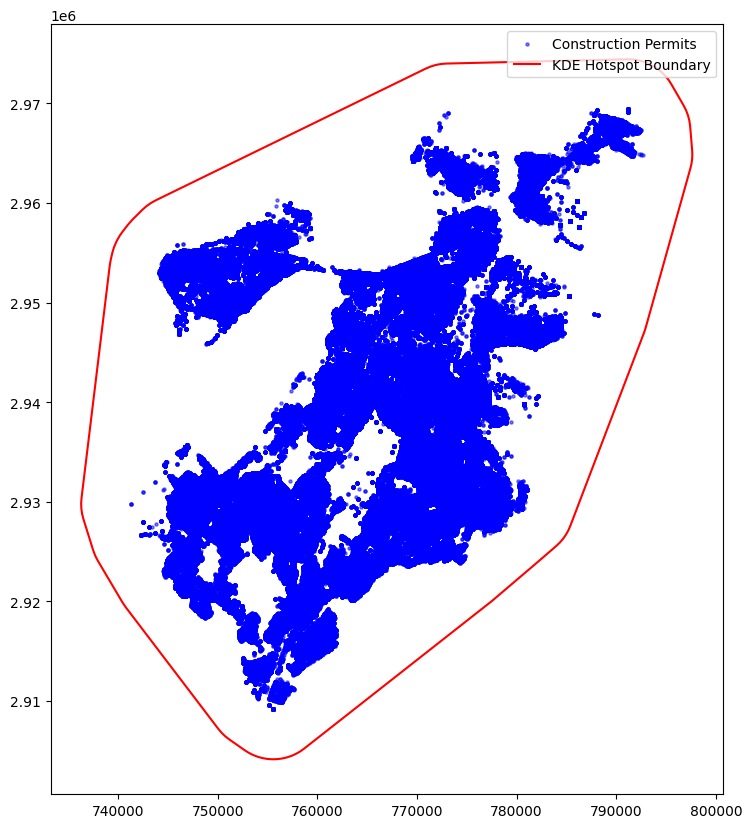

In [42]:
# Create a GeoDataFrame
gdf_permit = gpd.GeoDataFrame(
    df_add_lat_lon,
    geometry=gpd.points_from_xy(df_add_lat_lon.gpsx, df_add_lat_lon.gpsy),
    crs="EPSG:32619"
)

# Project to a coordinate system that uses meters as distance units (e.g., UTM)
gdf_projected = gdf_permit.to_crs(epsg=32619)  # Example uses UTM zone 19N for Boston; adjust for your area

# Perform KDE - adjust bandwidth as needed
kde_result = gdf_projected.geometry.unary_union.convex_hull.buffer(5000)  # Example buffer; adjust as needed

# Convert the KDE result back to a GeoDataFrame for plotting
kde_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(kde_result), crs=gdf_projected.crs)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 10))
gdf_projected.plot(ax=ax, color='blue', markersize=5, alpha=0.5, label='Construction Permits')
kde_gdf.boundary.plot(ax=ax, color='red', label='KDE Hotspot Boundary')
plt.legend()
plt.show()



741292.796226403 792643.000013918
2909158.87620801 2969427.02670158


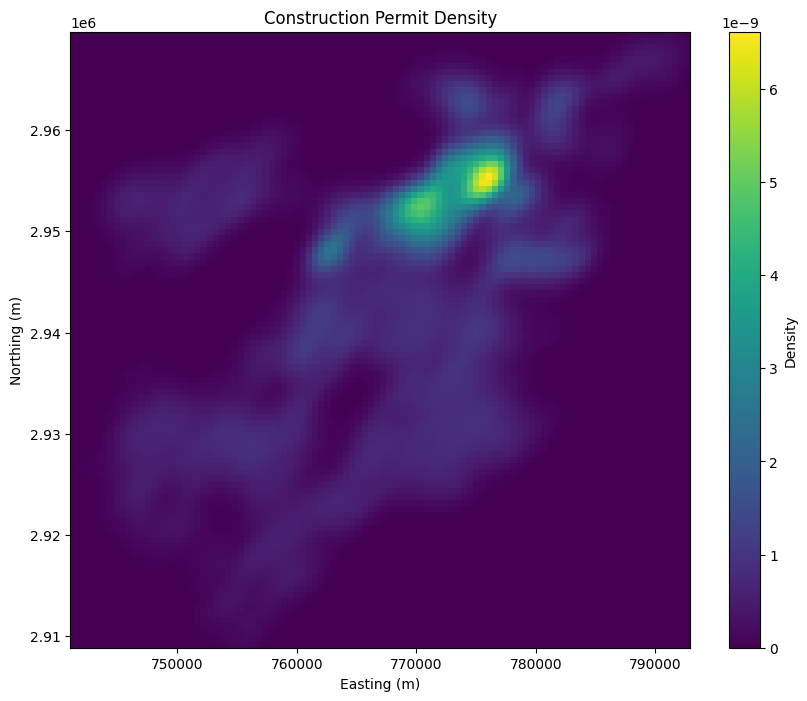

In [44]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load the data and convert gpsx and gpsy to numeric, coercing errors to NaNs
df_add_lat_lon = pd.read_csv('../data/permits_with_lat_lon.csv', low_memory=False)
df_add_lat_lon['gpsx'] = pd.to_numeric(df_add_lat_lon['gpsx'], errors='coerce')
df_add_lat_lon['gpsy'] = pd.to_numeric(df_add_lat_lon['gpsy'], errors='coerce')

# Remove any rows with NaN or infinite values in 'gpsx' or 'gpsy'
df_add_lat_lon = df_add_lat_lon.dropna(subset=['gpsx', 'gpsy'])
df_add_lat_lon = df_add_lat_lon[np.isfinite(df_add_lat_lon['gpsx']) & np.isfinite(df_add_lat_lon['gpsy'])]

# Create a GeoDataFrame, assuming the original data is latitude and longitude
gdf_permit = gpd.GeoDataFrame(
    df_add_lat_lon,
    geometry=gpd.points_from_xy(df_add_lat_lon.gpsx, df_add_lat_lon.gpsy),
    crs="EPSG:32619"
)

# Verify that the latitude and longitude are within the valid range
print(gdf_permit['geometry'].x.min(), gdf_permit['geometry'].x.max())  # should be between -180 and 180
print(gdf_permit['geometry'].y.min(), gdf_permit['geometry'].y.max())  # should be between -90 and 90

# If the range is valid, proceed to transform the CRS to UTM
try:
    gdf_projected = gdf_permit.to_crs(epsg=32619)  # only execute if the above print statements show valid ranges
except Exception as e:
    print(f"Error in transforming CRS: {e}")

# Proceed with the KDE only if the CRS transformation was successful
if 'gdf_projected' in locals():
    # Extract the x and y coordinates after projection
    x = gdf_projected.geometry.x
    y = gdf_projected.geometry.y

    # Perform KDE, ensuring no NaN or inf values are passed
    kde = gaussian_kde([x, y])

    # Create grid to evaluate KDE
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

    # Evaluate KDE on grid
    zz = np.reshape(kde(np.vstack([xx.ravel(), yy.ravel()])), xx.shape)

    # Plot heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    cmap = ax.pcolormesh(xx, yy, zz, shading='auto')
    plt.colorbar(cmap, ax=ax, label='Density')
    plt.title('Construction Permit Density')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.show()
